# Introduction

# 0. Importing Libraries and Other Code

In [151]:
# Import libraries

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Relevant variables

URL_DATASET = "../Datasets/"

Features = ['age','gender','tot_bilirubin','direct_bilirubin','alkphos','sgpt','sgot','tot_proteins','albumin','ag_ratio']
Target = 'is_patient'

In [121]:
# Color plotting

COLOR = '#7C92A0'
COLOR_PALETTE = ['#F5AE47','#47AAF5']

In [122]:
# Auxiliar variables

RANDOM_STATE = 8013

## 0.1 Defining Utilities Functions

In [123]:
def SplitFeaturesUsingDatatype(Dataset:pd.DataFrame,Features:list[str]):
    continuous , integer , categorical = [] , [] , []
    
    for feature in Features:
        if (data_type:=Dataset[feature].dtype) == 'float':
            continuous.append(feature)
        elif data_type == 'int':
            integer.append(feature)
        else:
            categorical.append(feature)
    
    return continuous , integer , categorical

In [124]:
def PlotFeaturesDistribution(Dataset:pd.DataFrame,Features:list[str],NameFeature:str):
    n_features = len(Features)
    fig , axes = plt.subplots(n_features,2,figsize=(12,4*n_features),layout='tight')

    for index , feature in enumerate(Features):
        sns.boxplot(Dataset,x=feature,y='gender',hue='is_patient',ax=axes[index,0],palette=COLOR_PALETTE)
        sns.histplot(Dataset,x=feature,ax=axes[index,1],stat='proportion',color=COLOR)

    fig.suptitle(f'Distribution of {NameFeature} Features',size=24)

In [ ]:
def PlotCorrelogram(Dataset:pd.DataFrame,Features:list[str]):
    fig , axes = plt.subplots(figsize=(9,8),layout='tight')
    correlation = Dataset[Features].corr()
    
    sns.heatmap(correlation,vmin=-1,vmax=1,annot=True,cmap='coolwarm',ax=axes)
    fig.suptitle('Correlation between Numerical Features',size=24)

In [150]:
def PlotPrincipalComponents(PrincipalComponents:np.ndarray,MainComponent:int):
    fig , axes = plt.subplots(4,2,figsize=(12,16))

    for axe , minor_component in zip(axes.ravel(),[minor_component for minor_component in range(PrincipalComponents.shape[1]) if minor_component != MainComponent]):
        sns.scatterplot(x=PrincipalComponents[:,MainComponent],y=PrincipalComponents[:,minor_component],ax=axe,hue=LiverDataset[Target],palette=COLOR_PALETTE)
        axe.set_xlabel(f'PC{MainComponent+1}')
        axe.set_ylabel(f'PC{minor_component+1}')

    fig.suptitle(f'Principal Component {MainComponent+1}\nversus The other Principal Components',size=24)

# 1. Load Dataset and First Exploration

This section deals with data loading, the renaming of the dataset attributes and a first exploration of the dataset for missing values or incorrect data types.

It was detected that there are 4 missing values in the ``ag_ratio`` attribute and the values of the ``is_patient`` target were transformed to a more understandable convention in its values.

First load the data set and rename the columns to use the attribute names in [Technical Requirements](../TechnicalRequirements.pdf).

In [126]:
# Loading dataset

LiverDataset = pd.read_csv(URL_DATASET+'IndianLiverPatientDataset.csv',index_col=None,header=None)

# Renaming attributes/columns

attributes_names = dict(zip(range(11),Features+[Target]))
LiverDataset.rename(columns=attributes_names,inplace=True)

LiverDataset.head(5)

,age,gender,tot_bilirubin,direct_bilirubin,alkphos,sgpt,sgot,tot_proteins,albumin,ag_ratio,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


The dataset has missing values in ``ag_ratio`` and the data types match the description of the dataset provided in [[1]](#references)

In [127]:
# Exploring missing values and data types

LiverDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   sgpt              583 non-null    int64  
 6   sgot              583 non-null    int64  
 7   tot_proteins      583 non-null    float64
 8   albumin           583 non-null    float64
 9   ag_ratio          579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


The values taken by the ``is_patient`` target are not the typical values of 1 and 0 or 'Yes' and 'No', but others. Therefore, when counting how many of each value there are, it is possible to determine which value corresponds to the positive and negative class of the dataset. And with that, values are transformed into 'Yes' and 'No' values.

In [128]:
# Weird target value

print('Values of `is_patient` :: ',LiverDataset.is_patient.unique())

LiverDataset.groupby(Target).size()

Values of `is_patient` ::  [1 2]


is_patient
1    416
2    167
dtype: int64

Because of the dataset contains records of 416 patients diagnosed with liver disease and 167 patients without liver disease, values with 1 correspond to 'Yes' and values with 2 correspond to 'No'.

In [129]:
# Transforming target values

target_values = np.array(['No','Yes'])

LiverDataset.is_patient = (target_values[LiverDataset.is_patient%2])

LiverDataset.groupby(Target).size()

is_patient
No     167
Yes    416
dtype: int64

In [130]:
# Checking data types

LiverDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   alkphos           583 non-null    int64  
 5   sgpt              583 non-null    int64  
 6   sgot              583 non-null    int64  
 7   tot_proteins      583 non-null    float64
 8   albumin           583 non-null    float64
 9   ag_ratio          579 non-null    float64
 10  is_patient        583 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


# 2. Missing Values

Since there are only 4 instances that have missing values in ``ag_ratio`` and there are 2 of each class or value of the target, it can be eliminated without generating a noticeable loss in the training instances.

In [131]:
# Dropping instance with missing values

LiverDataset.query("ag_ratio == ag_ratio",inplace=True)

LiverDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               579 non-null    int64  
 1   gender            579 non-null    object 
 2   tot_bilirubin     579 non-null    float64
 3   direct_bilirubin  579 non-null    float64
 4   alkphos           579 non-null    int64  
 5   sgpt              579 non-null    int64  
 6   sgot              579 non-null    int64  
 7   tot_proteins      579 non-null    float64
 8   albumin           579 non-null    float64
 9   ag_ratio          579 non-null    float64
 10  is_patient        579 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 54.3+ KB


In [132]:
# Saving a first cleaned version 

LiverDataset.to_csv(URL_DATASET+'IndianLiverPatientDataset_Clean01.csv',index=False)

# 3. Data Analysis

In [133]:
# Splitting features based on its data types

ContinuousFeatures , IntegerFeatures , CategoricalFeatures = SplitFeaturesUsingDatatype(LiverDataset,Features)

## 3.1 Distribution of Features [Univariate Analysis]

Because gender plays an important role in a patient's disease process, it must be taken into account when studying the data to see how the distribution of the data is altered by both ``gender`` and ``is_patient``.

It is highlighted that there is an imbalance in the distribution of ``gender`` because the value ``Female`` has a low representativeness in both classes in contrast with the value ``Male``, this will have implications at the time of training the model because it will not have enough instances of these qualities to find a pattern when generating the classification.

Using the box plots it can be determined that some features report a reasonable amount of outliers, that is, an amount that could be avoided; on the other hand in other features the opposite happens, because they have too extreme values even if we consider the quartile values they take, and this is due to the range of values they take, to reduce the impact of this range what could be done is to apply a function such as ``sqrt`` or ``log10`` to compact the range in a non-linear way.

When transforming the features ``tot_bilirubin``, ``direct_bilirubin``, ``alkphos``, ``sgpt`` and ``sgot`` with ``log10``, the impact of the outliers was considerably reduced in the sense that their amounts can be considered normal and, in some cases, they could be ignored and considered for the clean dataset.

Considering the histograms, it can be seen that they follow a trend of a normal distribution, Student's t or $\chi^2$ (these last two have a certain normal behavior), with this many of the Machine Learning algorithms are going to obtain the best possible results or find patterns in a better way.

Considering the box plots, it can be observed that there is an overlap, this would mean that there is no significant difference in the means and medians of the distributions, which is equivalent to the fact that the model will have a difficult to learn to differentiate between classes because many of the values taken by the attributes are shared in both classes. Otherwise, there may be two patients who have the same clinical indicators but one has liver disease while the other does not.

In [134]:
# Distribution of Gender

LiverDataset.pivot_table('age',CategoricalFeatures[0],Target,'count')

is_patient,No,Yes
gender,,
Female,49,91
Male,116,323


### 3.1.1 Distribution of Continuous Features

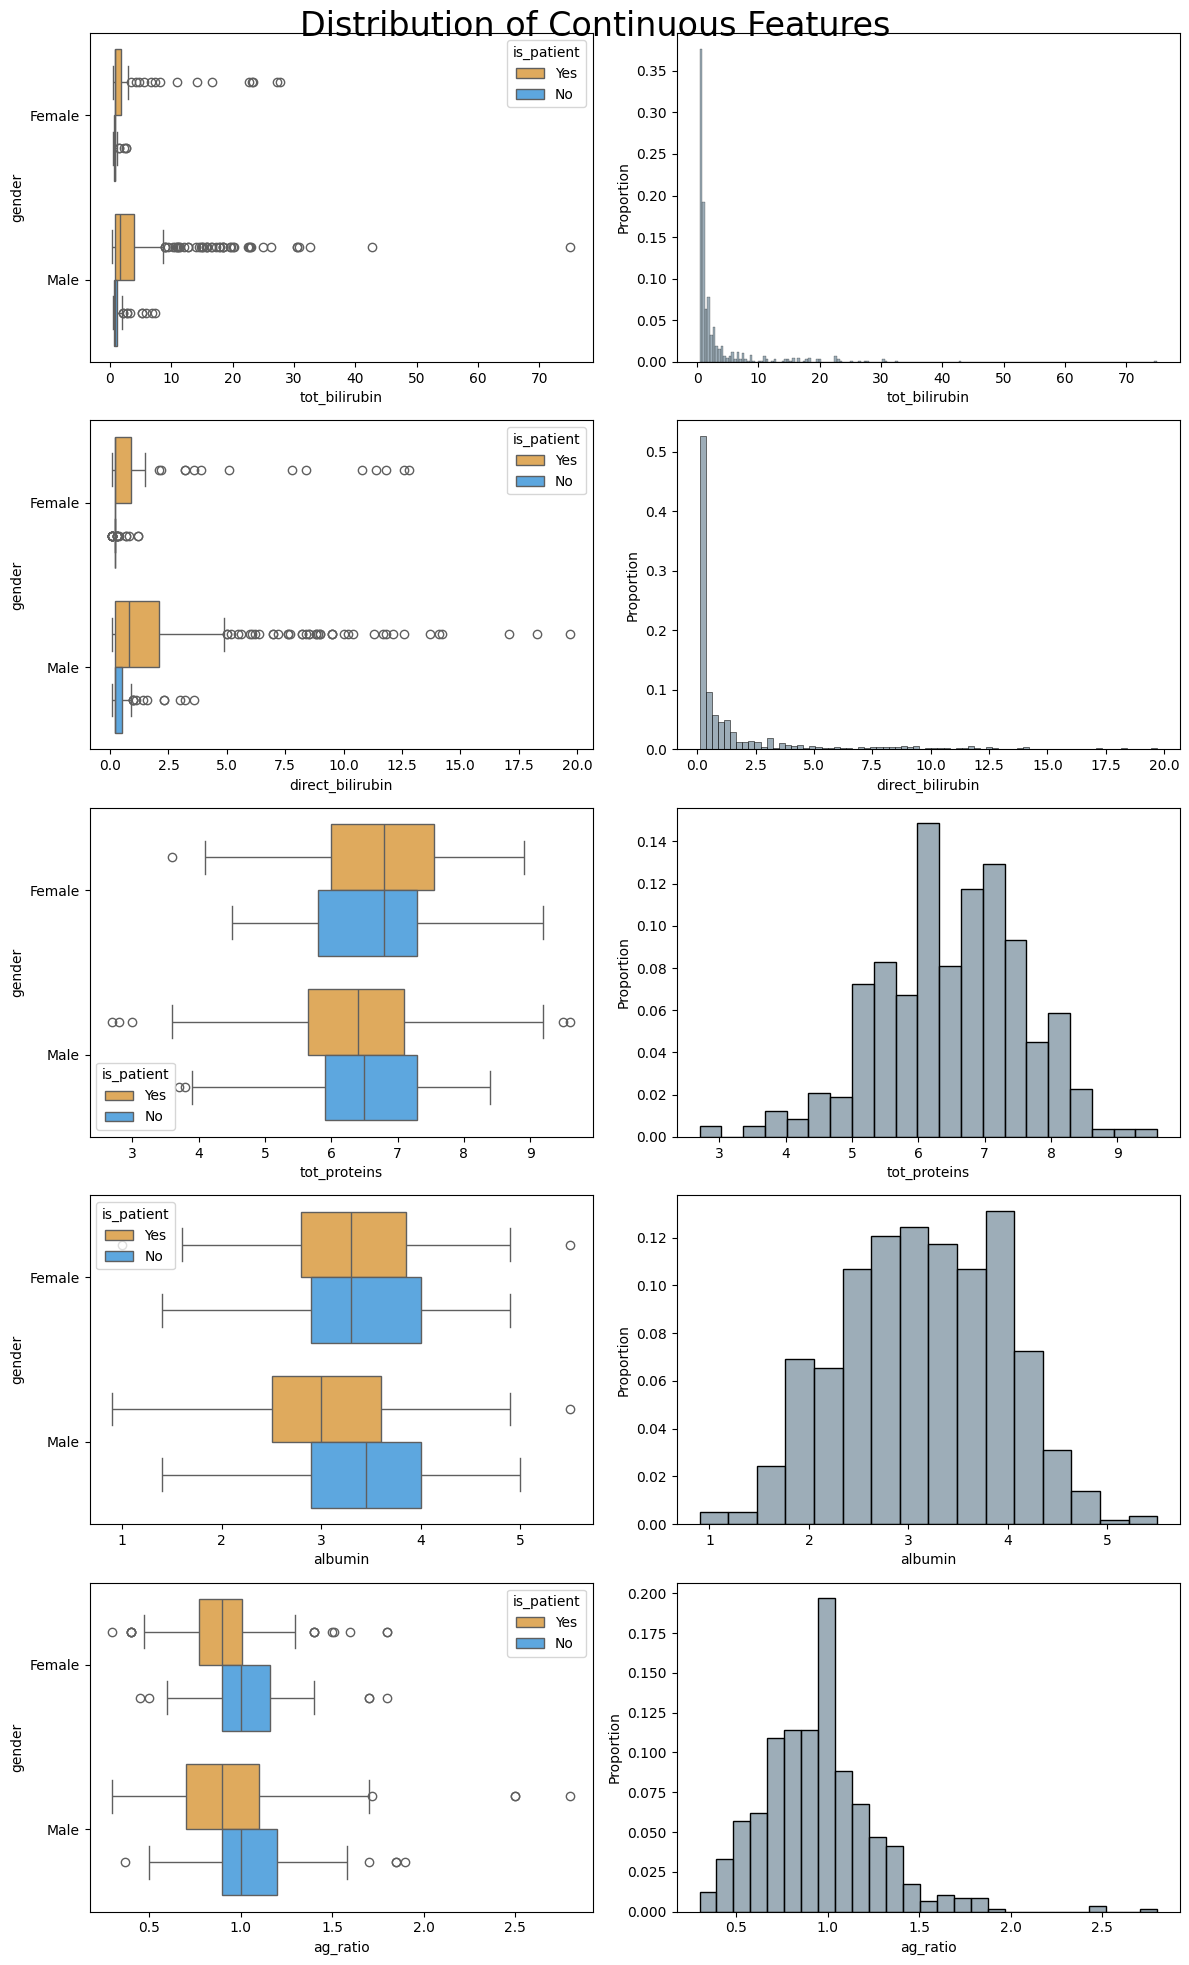

In [135]:
PlotFeaturesDistribution(LiverDataset,ContinuousFeatures,'Continuous')

### 3.1.2 Distribution of Integer Features

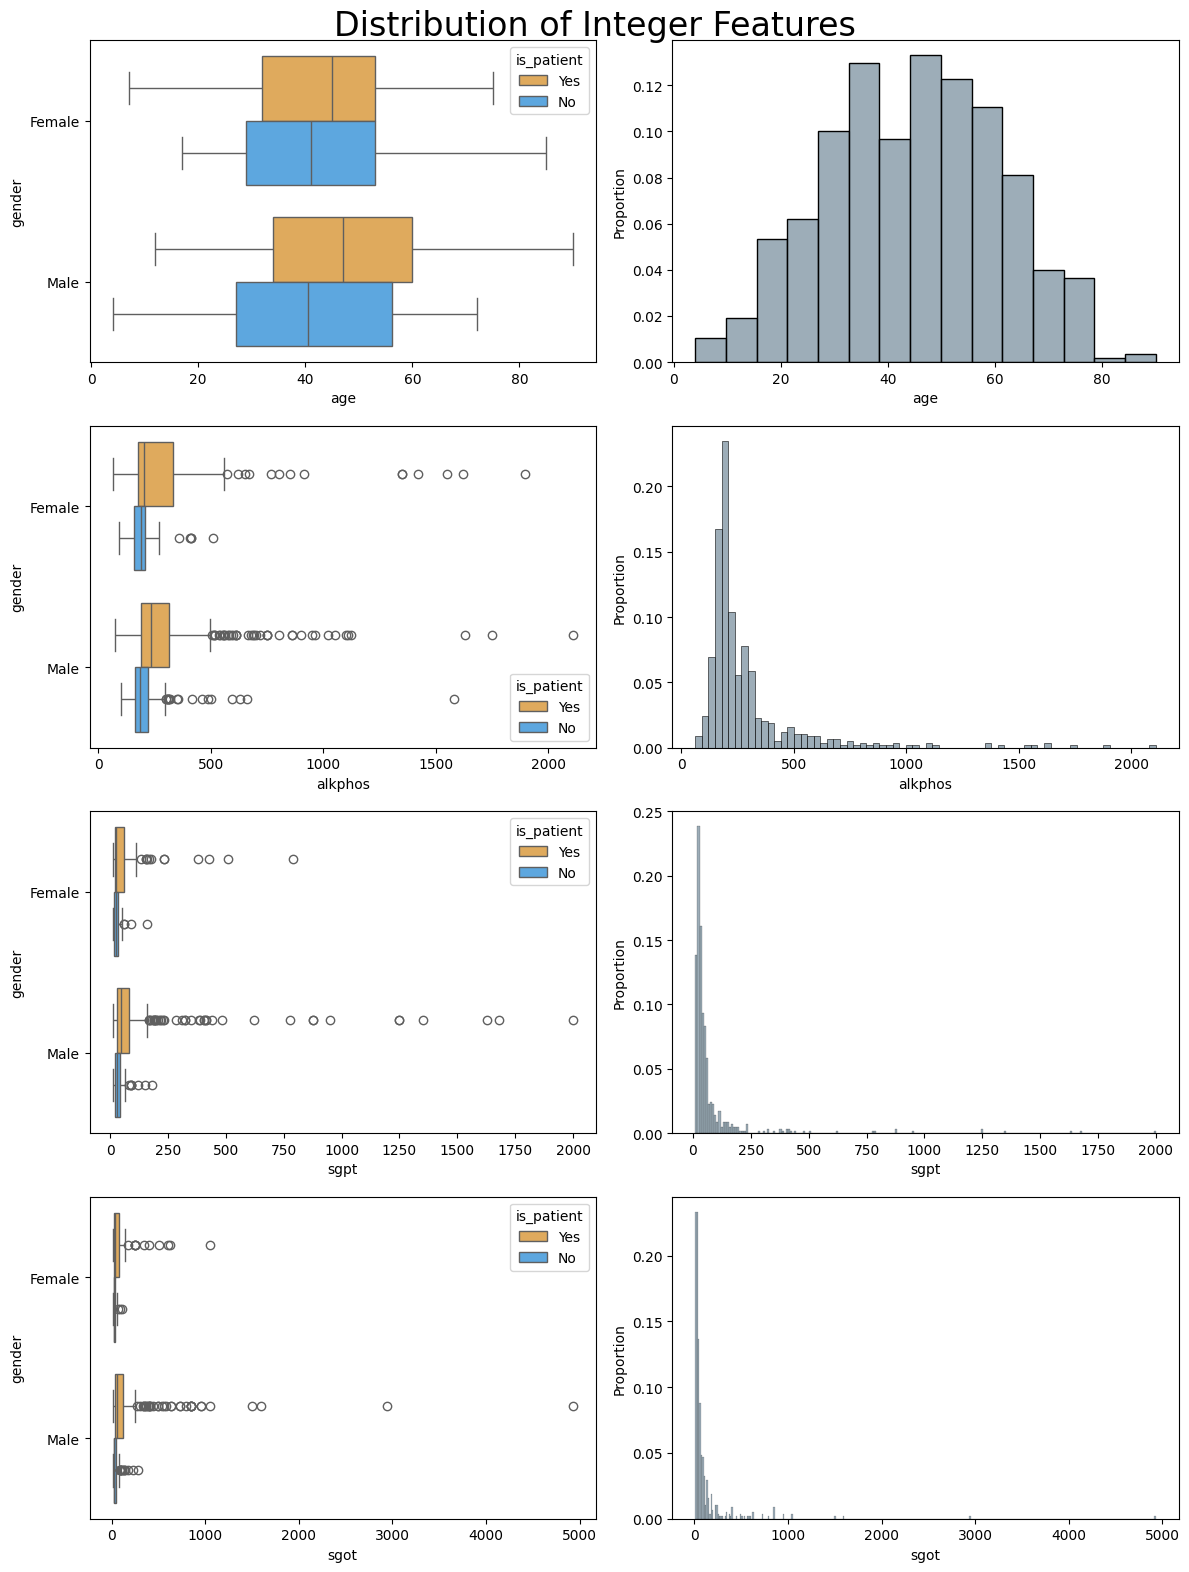

In [136]:
PlotFeaturesDistribution(LiverDataset,IntegerFeatures,'Integer')

### 3.1.3 Nonlinear Transformation of Attributes

In [137]:
# Applying Log_10 Transformation

features_transformation = [*ContinuousFeatures[:2],*IntegerFeatures[1:]]

for feature in features_transformation:
    LiverDataset[feature] = np.log10(LiverDataset[feature])

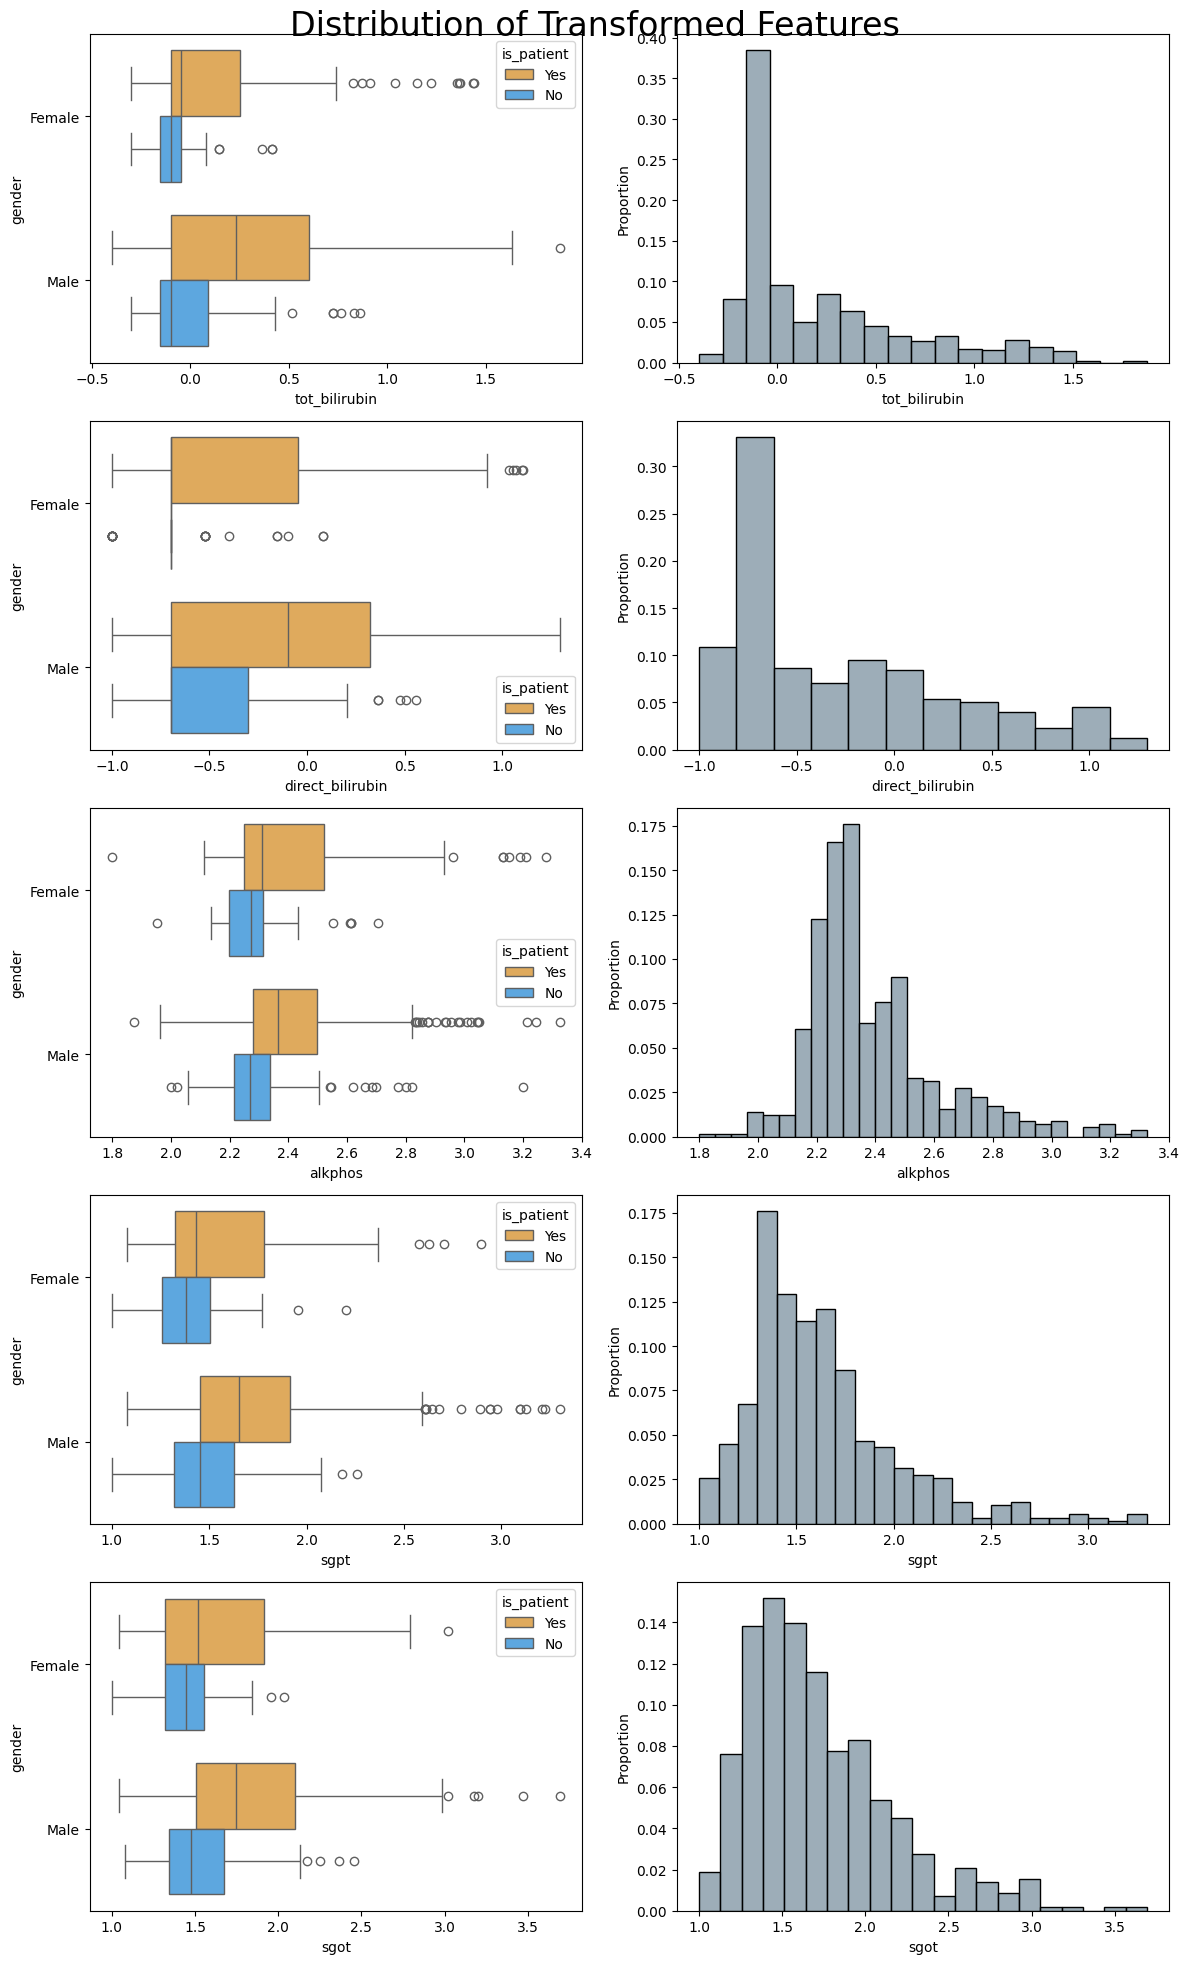

In [138]:
PlotFeaturesDistribution(LiverDataset,features_transformation,'Transformed')

## 3.2 Bivariate Analysis

From the correlogram, it can be seen that many of the variables are in linear relationships, so there is information that becomes redundant at the time of making the prediction or understanding the different relationships. Therefore, the variables could be reduced through the use of Principal Component Analysis (PCA). The only problem with this reduction is that non-linear relationships in the original space could be lost, so it becomes more relevant to keep both the original attributes and those transformed under PCA.

Performing the transformation of the numerical attributes using PCA, it is found that the first three components explain approximately ``99.8%`` of the variance in the data, that is, using these principal components it is possible to preserve the linear relationships of the original attributes in addition to preserving part of the information they originally had. 

Using scatter plots of the principal component values of each instance, it can be seen that by using the first three components against all the others one can see how the data starts to cluster according to their ``is_patient`` value, this could be related to the loss of variability explained by the data or to non-linear relationships that could be preserved or captured with PCA. Specifically, it can be observed that using the first four components, groups are generated according to the value of the target or start to cluster due to the loss of variability explained. 

Finally, these groups that are generated are overlapped, indicating that they are not linearly separable, so it would be convenient for the classification model to take advantage of non-linear transformations to generate the separation between groups, such as using models like SVM or Random Forest.

### 3.2.1 Correologram

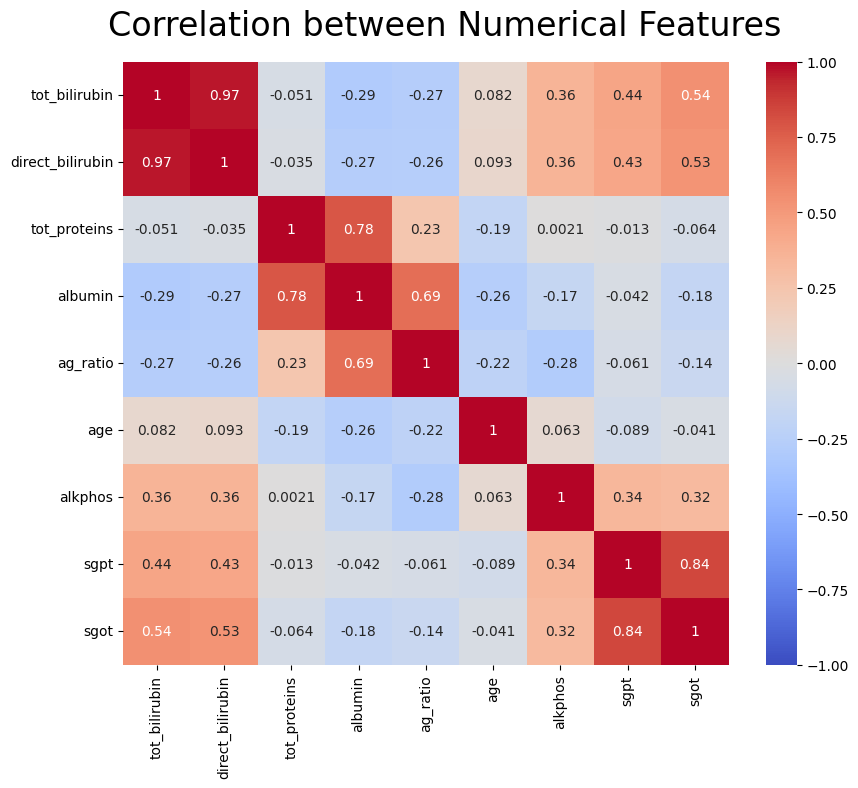

In [139]:
PlotCorrelogram(LiverDataset,ContinuousFeatures+IntegerFeatures)

### 3.2.2 Principal Component Analysis (PCA)

In [163]:
PCA_Model = PCA(whiten=True,random_state=RANDOM_STATE)
Principal_Component = PCA_Model.fit_transform(LiverDataset[ContinuousFeatures+IntegerFeatures])

print('Explained Variance Ratio')
for principal_component , variance_ratio in enumerate(PCA_Model.explained_variance_ratio_):
    print(f'PC{principal_component+1}: {variance_ratio:.4f}')

Explained Variance Ratio
PC1: 0.9897
PC2: 0.0059
PC3: 0.0025
PC4: 0.0008
PC5: 0.0006
PC6: 0.0002
PC7: 0.0001
PC8: 0.0001
PC9: 0.0000


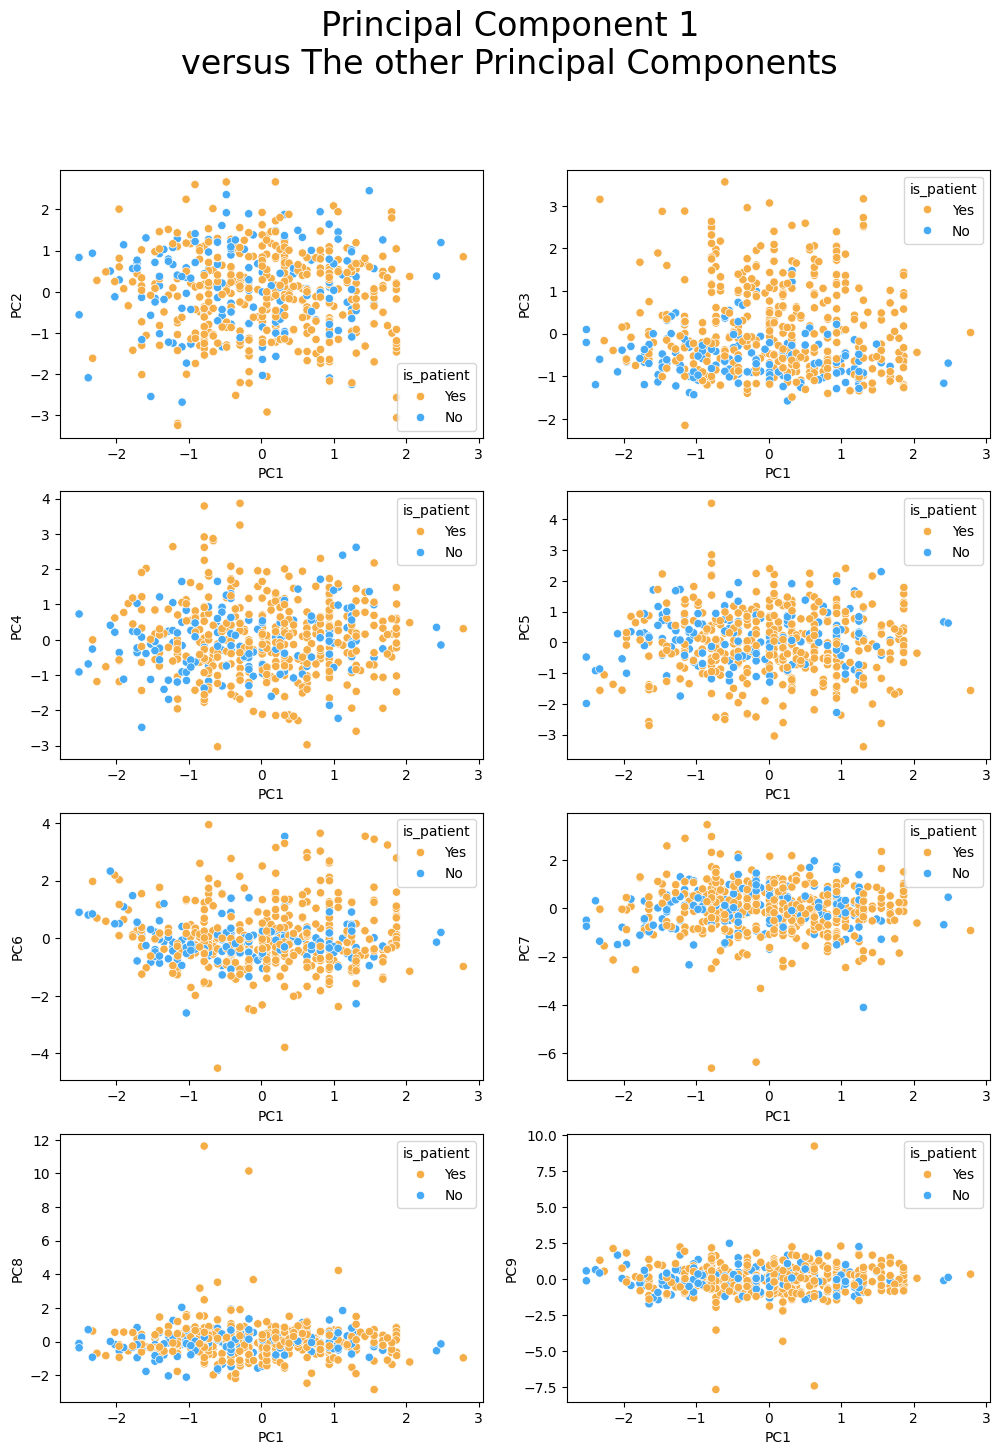

In [154]:
PlotPrincipalComponents(Principal_Component,0)

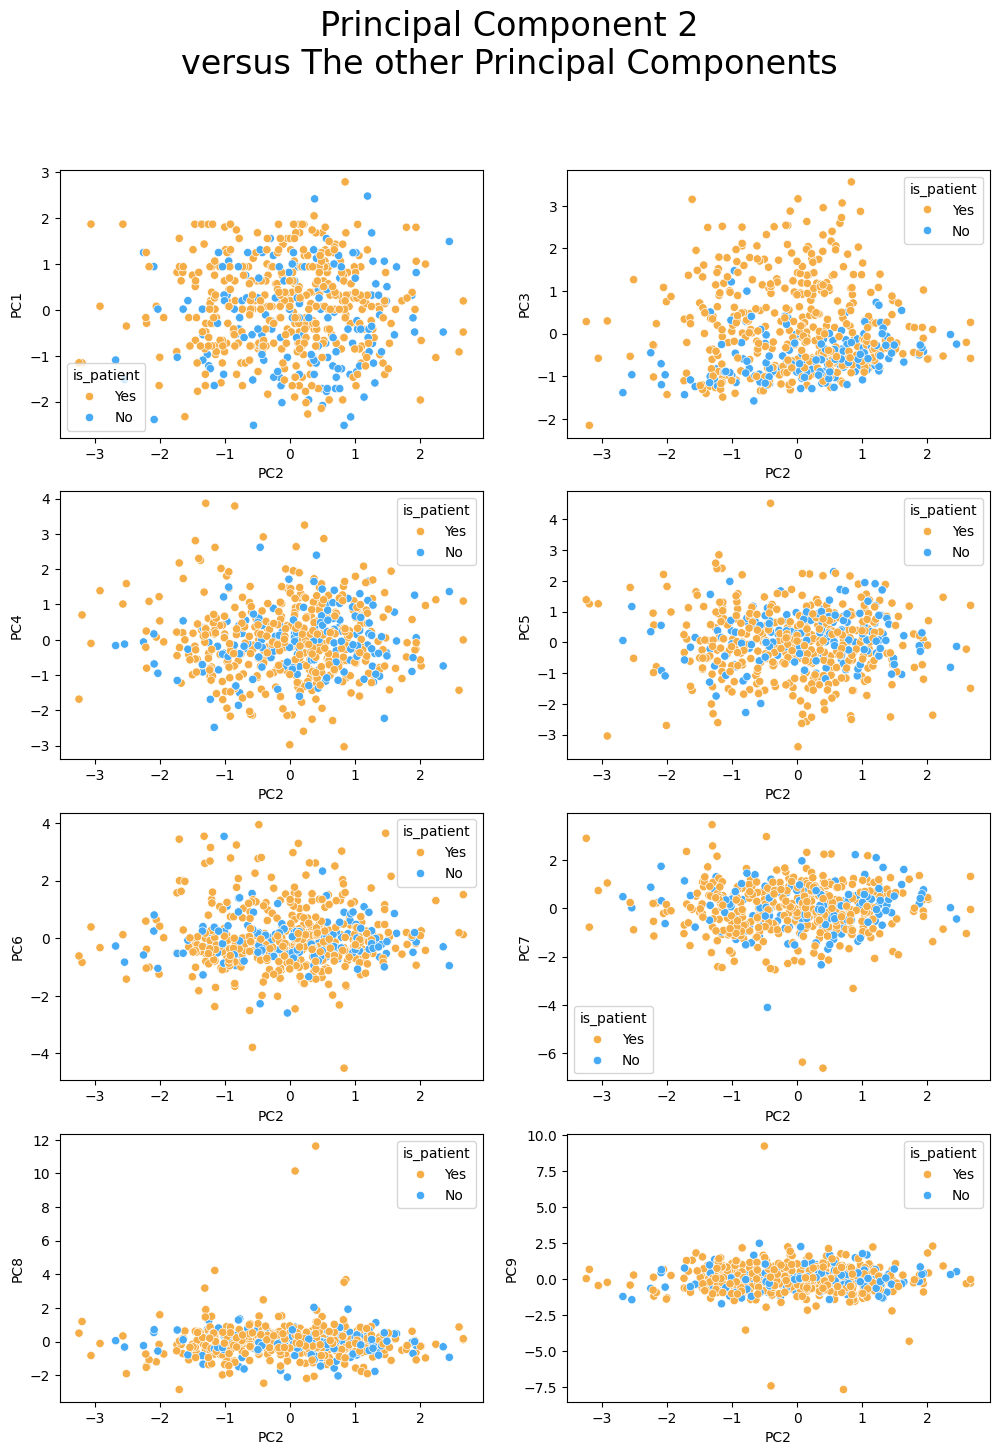

In [155]:
PlotPrincipalComponents(Principal_Component,1)

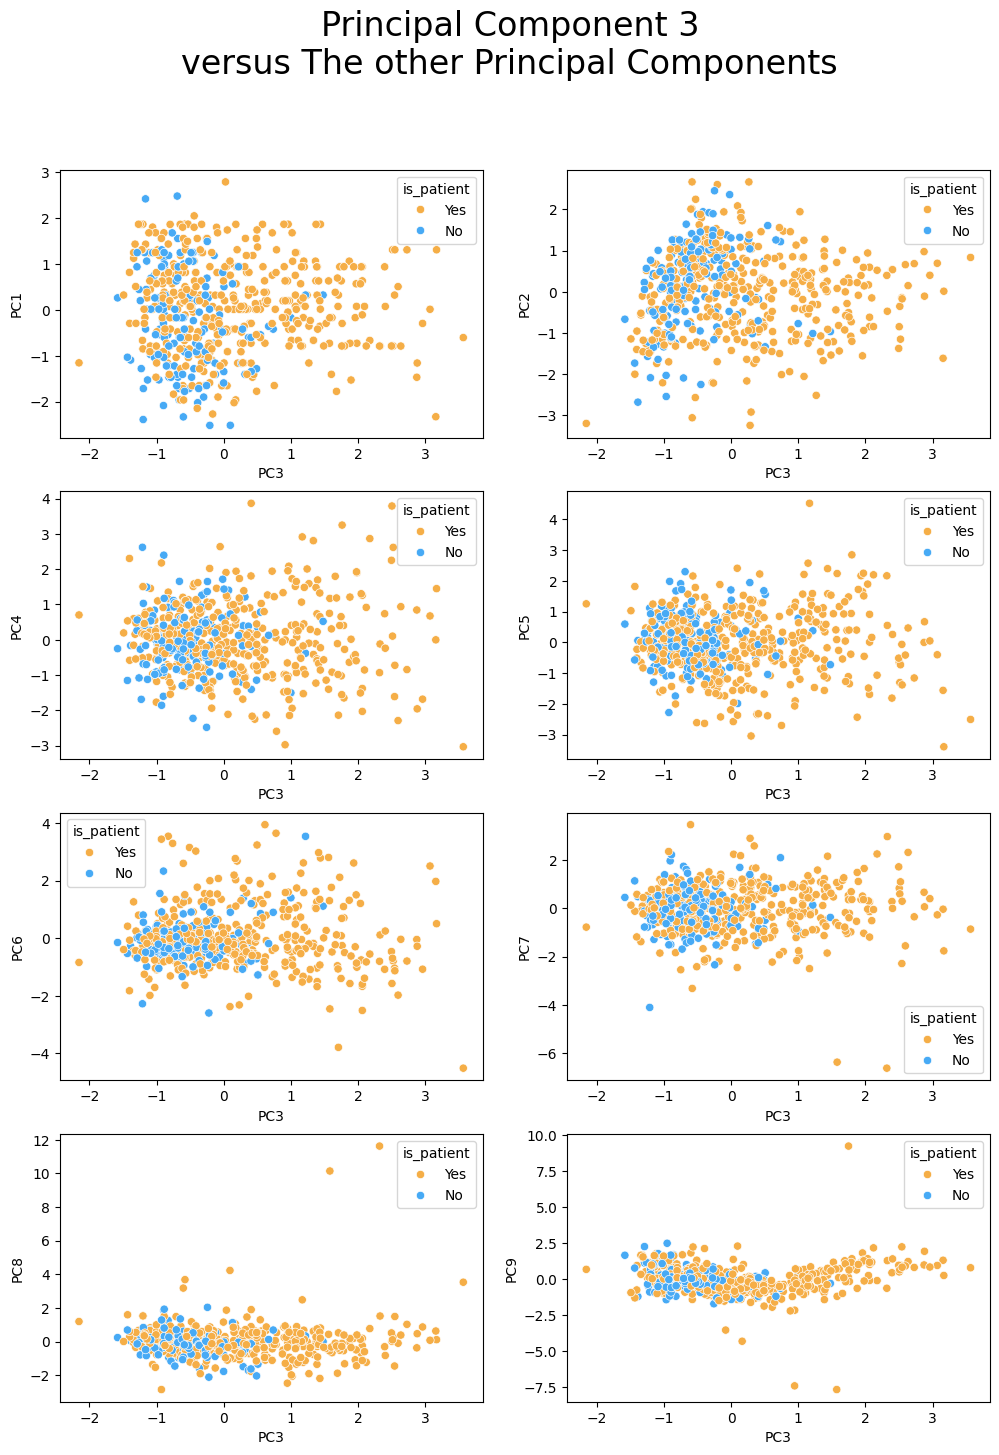

In [156]:
PlotPrincipalComponents(Principal_Component,2)

# References

* [1] B. Ramana and N. Venkateswarlu. "ILPD (Indian Liver Patient Dataset)," UCI Machine Learning Repository, 2022. [Online]. Available: https://doi.org/10.24432/C5D02C.